<a href="https://colab.research.google.com/github/Neverlost0311/nlp-word-embeddings-lab/blob/main/02-semantic-similarity/lab2_semantic_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Visualizing Semantic Similarity with Embeddings

## Goal

In this lab, we will visualize how word embeddings capture semantic meaning by projecting
high-dimensional vectors into 2D space.

We will:
- Generate embeddings for a list of words
- Reduce dimensions using UMAP
- Plot and visualize semantic clusters
- Observe how related concepts group together (animals, royalty, vehicles, etc.)

This lab builds intuition for how embeddings represent meaning geometrically.

---

### What you will learn

- Why similar words cluster together in embedding space
- How dimensionality reduction (UMAP) works conceptually
- How to visualize and interpret semantic structure
- How to sanity-check embedding quality using plots


In [1]:
# ==============================
# Cell 2: Install & Import Libraries
# ==============================

# Install required libraries
!pip install -q google-genai umap-learn matplotlib seaborn pandas adjustText

# Imports
from google import genai
import getpass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import umap

print("✅ All libraries installed and imported successfully.")


✅ All libraries installed and imported successfully.


In [2]:
# ==============================
# Cell 3: Load API Key & Create Client
# ==============================

# Securely ask for API key (hidden while typing)
api_key = getpass.getpass("Enter your Gemini API Key: ")

# Create Gemini client
client = genai.Client(api_key=api_key)

print("✅ API key loaded and Gemini client created successfully.")


Enter your Gemini API Key: ··········
✅ API key loaded and Gemini client created successfully.


In [3]:
# ==============================
# Cell 4: Embedding Helper Functions
# ==============================

MODEL_NAME = "text-embedding-004"

def get_embedding(text: str) -> np.ndarray:
    """
    Generate embedding for a single text string.
    Returns a numpy array.
    """
    result = client.models.embed_content(
        model=MODEL_NAME,
        contents=text
    )
    return np.array(result.embeddings[0].values)


def get_embeddings_batch(texts: list[str]) -> np.ndarray:
    """
    Generate embeddings for a list of texts.
    Returns a 2D numpy array: (num_texts, embedding_dim)
    """
    result = client.models.embed_content(
        model=MODEL_NAME,
        contents=texts
    )

    embeddings = [e.values for e in result.embeddings]
    return np.array(embeddings)


print("✅ Embedding functions ready.")


✅ Embedding functions ready.


In [4]:
# ==============================
# Cell 5: Small Toy Dataset (Words)
# ==============================

# A small, carefully chosen set of words to visualize semantic structure
small_words = [
    # Animals
    "cat", "kitten", "dog", "puppy",

    # Humans & royalty
    "man", "woman", "king", "queen", "boy", "girl",

    # Vehicles
    "car", "truck", "bike", "bus"
]

print("Number of words in small dataset:", len(small_words))
print("Words:")
print(small_words)


Number of words in small dataset: 14
Words:
['cat', 'kitten', 'dog', 'puppy', 'man', 'woman', 'king', 'queen', 'boy', 'girl', 'car', 'truck', 'bike', 'bus']


In [5]:
# ==============================
# Cell 6: Generate Embeddings for Small Dataset
# ==============================

# Generate embeddings
small_embeddings = get_embeddings_batch(small_words)

print("✅ Embeddings generated.")
print("Shape of embedding matrix:", small_embeddings.shape)


✅ Embeddings generated.
Shape of embedding matrix: (14, 768)


In [6]:
# ==============================
# Cell 7: Dimensionality Reduction using UMAP
# ==============================

# Create UMAP reducer
reducer = umap.UMAP(
    n_neighbors=5,     # how local vs global structure is preserved
    n_components=2,    # reduce to 2D
    metric="cosine",   # cosine distance works well for embeddings
    random_state=42
)

# Fit and transform the embeddings
small_embeddings_2d = reducer.fit_transform(small_embeddings)

print("✅ Dimensionality reduction complete.")
print("New shape:", small_embeddings_2d.shape)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ Dimensionality reduction complete.
New shape: (14, 2)


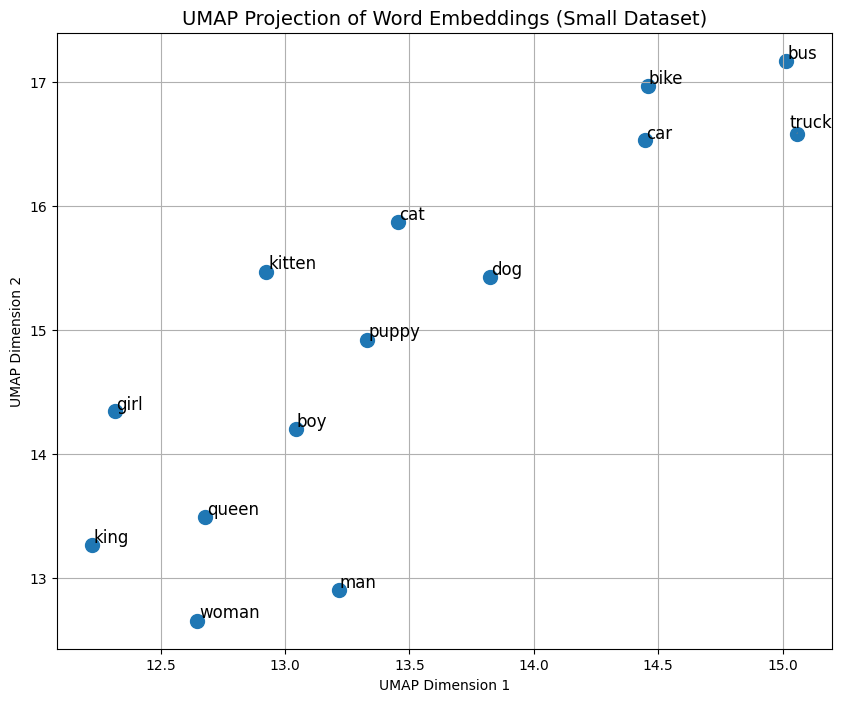

In [7]:
# ==============================
# Cell 8: Visualize Small Dataset Embeddings (2D Plot)
# ==============================

plt.figure(figsize=(10, 8))

# Scatter plot
x = small_embeddings_2d[:, 0]
y = small_embeddings_2d[:, 1]

plt.scatter(x, y, s=100)

# Add labels to each point
texts = []
for i, word in enumerate(small_words):
    texts.append(plt.text(x[i], y[i], word, fontsize=12))

# Adjust text to avoid overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

# Plot styling
plt.title("UMAP Projection of Word Embeddings (Small Dataset)", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)

plt.show()


# Interpretation: What Does This Visualization Show?

Each point in the plot represents a word, projected from a 768-dimensional embedding space down to 2 dimensions using UMAP.

Even though we never told the model which words are animals, vehicles, or humans, we can clearly observe **semantic clusters**:

- 🐾 **Animals**: `cat`, `kitten`, `dog`, `puppy` appear close together
- 👑 **Humans & royalty**: `man`, `woman`, `boy`, `girl`, `king`, `queen` form another group
- 🚗 **Vehicles**: `car`, `truck`, `bus`, `bike` form their own cluster

## Why does this happen?

The embedding model was trained on massive amounts of text and learned that:

- `cat`, `dog`, `kitten`, `puppy` appear in similar contexts
- `king`, `queen`, `man`, `woman` share human and social contexts
- `car`, `truck`, `bus`, `bike` appear in transportation contexts

Because of this, their vectors end up **pointing in similar directions** in high-dimensional space.

UMAP then preserves these neighborhood relationships when projecting to 2D.

## Key Insight

> **Semantic similarity becomes geometric proximity.**

Words with similar meanings naturally cluster together in embedding space, even without any manual labels or rules.

This is the foundation of:
- Semantic search
- Recommendation systems
- Document clustering
- Retrieval-Augmented Generation (RAG)


In [8]:
import zipfile
import os

zip_path = "25bf82dd-b16e-4f0f-9ea2-eba1c8eb9828_Code-text_embeddings (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("✅ ZIP extracted successfully!")
print(os.listdir("dataset"))


✅ ZIP extracted successfully!
['Code']


In [9]:
for root, dirs, files in os.walk("dataset"):
    for name in files:
        print(os.path.join(root, name))


dataset/Code/Code - gemini version/Understanding_and_Applying_Text_Embeddings_in_LLM_Systems_Gemini.ipynb
dataset/Code/Code - gemini version/data/unique_word_list.csv
dataset/Code/Code - gemini version/data/IMDB Dataset.csv
dataset/Code/Code - gemini version/data/pets/Health Care for Pets.txt
dataset/Code/Code - gemini version/data/pets/The Emotional Bond Between Humans and Pets.txt
dataset/Code/Code - gemini version/data/pets/Different Types of Pet Animals.txt
dataset/Code/Code - gemini version/data/pets/Nutrition Needs of Pet Animals.txt
dataset/Code/Code - gemini version/data/pets/Training and Behaviour of Pets.txt
dataset/Code/code - openai version/Understanding_and_Applying_Text_Embeddings_in_LLM_Systems.ipynb
dataset/Code/code - openai version/data/unique_word_list.xlsx
dataset/Code/code - openai version/data/unique_word_list.csv
dataset/Code/code - openai version/data/IMDB Dataset.csv
dataset/Code/code - openai version/data/pets/Health Care for Pets.txt
dataset/Code/code - opena

In [10]:
import pandas as pd

# Path to the large word list CSV (Gemini version)
csv_path = "dataset/Code/Code - gemini version/data/unique_word_list.csv"

# Load CSV
df = pd.read_csv(csv_path)

print("CSV loaded successfully!")
print("Shape:", df.shape)
print("First 10 rows:")
print(df.head(10))


CSV loaded successfully!
Shape: (109, 1)
First 10 rows:
         word
0       small
1  helicopter
2       pizza
3         big
4       queen
5      father
6      laptop
7        girl
8      desert
9       bored


In [11]:
# Extract words column
large_words = df["word"].dropna().astype(str).str.strip().tolist()

# Remove duplicates (just in case)
large_words = list(dict.fromkeys(large_words))

print("Number of words in large dataset:", len(large_words))
print("Sample words:", large_words[:20])


Number of words in large dataset: 109
Sample words: ['small', 'helicopter', 'pizza', 'big', 'queen', 'father', 'laptop', 'girl', 'desert', 'bored', 'cheese', 'strong', 'write', 'sleep', 'dog', 'keyboard', 'sun', 'dark', 'valley', 'play']


In [13]:
# ==============================
# Safe batch embedding for large lists
# ==============================

def get_embeddings_batch_safe(texts, batch_size=50):
    """
    Generate embeddings for a large list of texts by splitting into batches.
    Returns a 2D numpy array: (num_texts, embedding_dim)
    """
    all_embeddings = []

    print(f"Total texts: {len(texts)}")
    print(f"Processing in batches of {batch_size}...")

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        print(f"Embedding batch {i} to {i+len(batch)-1}...")

        result = client.models.embed_content(
            model=MODEL_NAME,
            contents=batch
        )

        batch_embeddings = [e.values for e in result.embeddings]
        all_embeddings.extend(batch_embeddings)

    return np.array(all_embeddings)


print("✅ Safe batch embedding function ready.")


✅ Safe batch embedding function ready.


In [14]:
# ==============================
# Generate Embeddings for Large Dataset (Batched)
# ==============================

print("Generating embeddings for large dataset using batching...")

large_embeddings = get_embeddings_batch_safe(large_words, batch_size=50)

print("✅ Embeddings generated.")
print("Shape of embedding matrix:", large_embeddings.shape)


Generating embeddings for large dataset using batching...
Total texts: 109
Processing in batches of 50...
Embedding batch 0 to 49...
Embedding batch 50 to 99...
Embedding batch 100 to 108...
✅ Embeddings generated.
Shape of embedding matrix: (109, 768)


In [15]:
# ==============================
# UMAP Reduction for Large Dataset (768D -> 2D)
# ==============================

# Create UMAP reducer for large dataset
large_reducer = umap.UMAP(
    n_neighbors=10,    # slightly higher for larger dataset
    n_components=2,
    metric="cosine",
    random_state=42
)

print("Running UMAP on large dataset...")

large_embeddings_2d = large_reducer.fit_transform(large_embeddings)

print("✅ UMAP reduction complete.")
print("New shape:", large_embeddings_2d.shape)


Running UMAP on large dataset...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ UMAP reduction complete.
New shape: (109, 2)


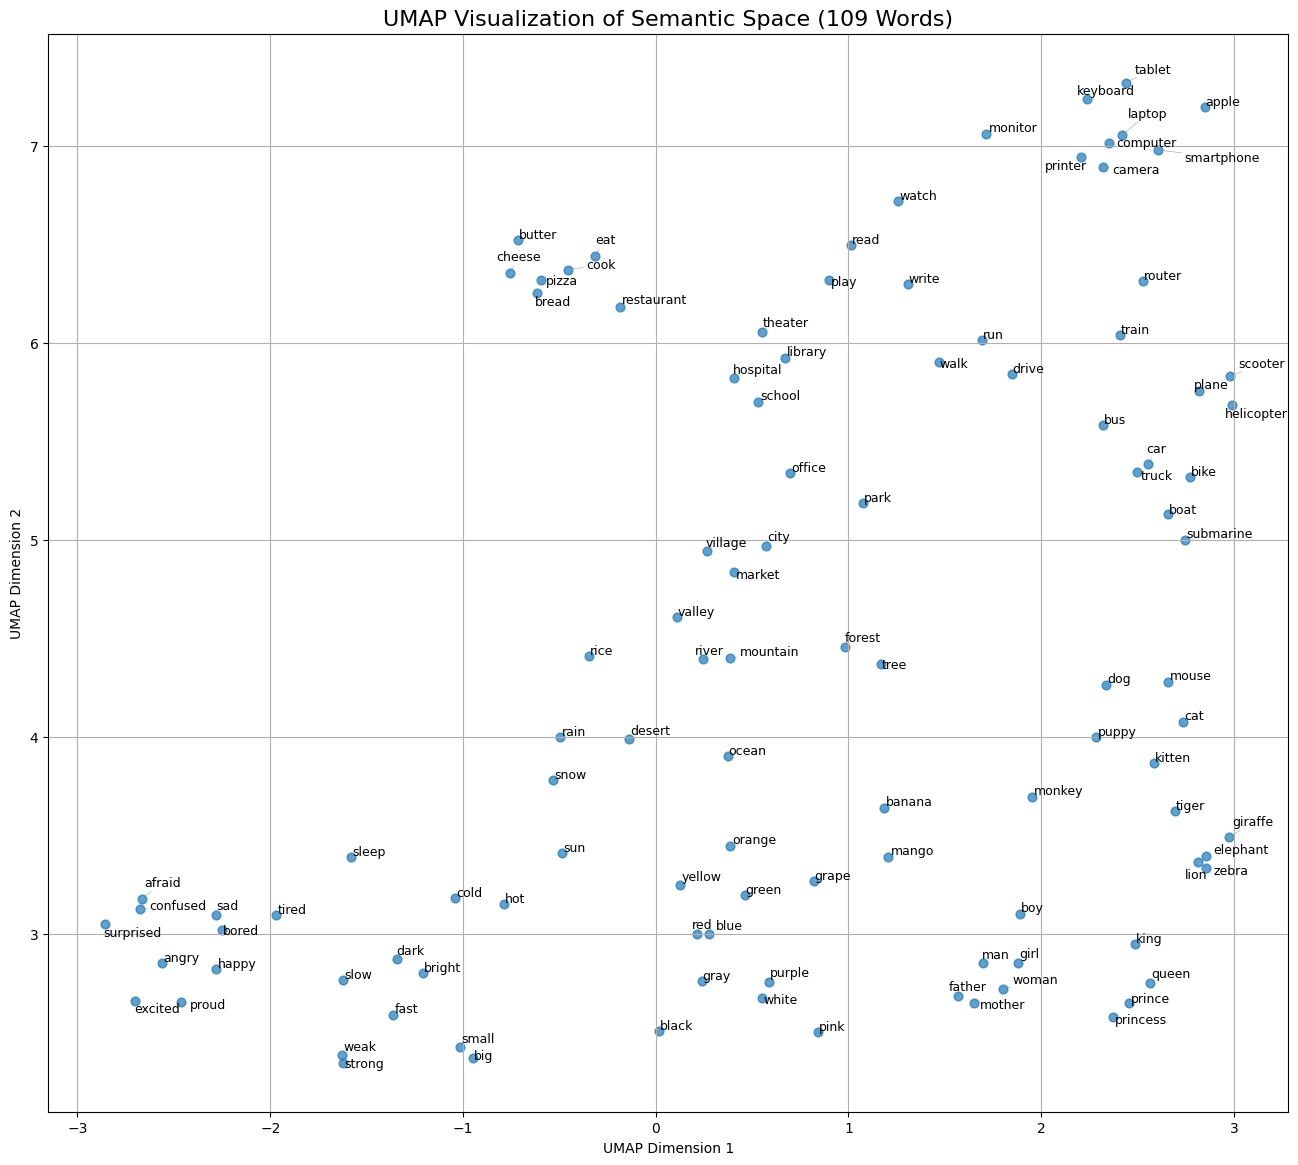

In [16]:
# ==============================
# Visualization: Large Semantic Map
# ==============================

plt.figure(figsize=(16, 14))

x = large_embeddings_2d[:, 0]
y = large_embeddings_2d[:, 1]

# Scatter plot
plt.scatter(x, y, s=40, alpha=0.7)

# Add labels (with smart collision handling)
texts = []
for i, word in enumerate(large_words):
    texts.append(plt.text(x[i], y[i], word, fontsize=9))

# Automatically adjust text to avoid overlaps
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.3),
    force_text=0.5
)

# Styling
plt.title("UMAP Visualization of Semantic Space (109 Words)", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)

plt.show()


## ✅ Lab 2 Conclusions: Visualizing Semantic Space

In this lab, we visualized how high-dimensional word embeddings capture semantic meaning by projecting them into 2D using UMAP.

### 🔍 Observations

From the visualization of 109 words, we can clearly observe:

- **Animals cluster together**:  
  cat, dog, puppy, kitten, tiger, lion, elephant appear close to each other.

- **Vehicles form another cluster**:  
  car, truck, bus, bike, train, helicopter, scooter are grouped nearby.

- **Technology terms group together**:  
  laptop, computer, keyboard, phone, tablet, camera appear in the same region.

- **Food items cluster**:  
  pizza, bread, cheese, butter, mango, banana, orange appear near each other.

- **Emotions cluster separately**:  
  happy, sad, angry, bored, tired, afraid form a distinct emotional region.

- **Nature / places cluster**:  
  river, mountain, forest, ocean, valley, desert appear near each other.

### 🧠 Key Insight

> **Semantic similarity becomes geometric proximity.**

Words with similar meanings naturally cluster together in embedding space **without any manual labels or rules**.

### 📐 Why UMAP Works Well

UMAP preserves local neighborhood structure from high-dimensional space, meaning:

- Nearby points in 768D remain nearby in 2D
- Distant concepts remain far apart

### 🚀 Why This Matters

This is the foundation of:

- Semantic Search  
- Recommendation Systems  
- Document Clustering  
- Retrieval-Augmented Generation (RAG)  
- Topic Discovery  

### ⚠️ Important Note

This 2D plot is a **projection** of a 768D space. Some distortions are normal. Real similarity should always be verified using **cosine similarity** in the original embedding space.

---

## 🏁 Final Conclusion

This experiment demonstrates that modern embedding models encode meaning as **geometric structure** in high-dimensional space, and that **visualization makes this structure intuitively understandable**.
